In [1]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
housing = pd.read_csv('../data/train.csv')

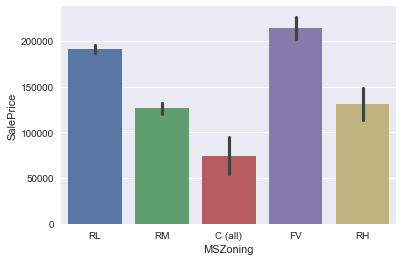

In [3]:
sns.barplot(housing.MSZoning, housing.SalePrice)

Break into categories:

- Lot features
- House continuous
- House categorical
- Garage features
- Misc. features

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=21)
for train_ix, test_ix in split.split(housing, housing['MSZoning']):
    df_train = housing.loc[train_ix]
    df_test = housing.loc[test_ix]

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1275,1276,90,RL,95.0,11345,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,137000
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900


In [6]:
#House Features

#Continuous features
H_contin_cols = ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea']

#Ordinal features
H_ordin_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
               'TotRmsAbvGrd', 'Functional']

#Categorical features
H_cat_cols = ['MSSubClass', 'BldgType', 'HouseStyle' ]

In [7]:
#Lot Features

#Continuous features
L_contin_cols = ['LotFrontage', 'LotArea']

#Ordinal features
L_ordin_cols = ['LotShape', 'LandSlope']

#Categorical features
L_cat_cols = ['MSZoning', 'Street', 'Alley', 'Utilities','LandContour',
              'LotConfig',  'Neighborhood', 'Condition1', 'Condition2' ]

In [8]:
#Garage Features

#Continuous features
G_contin_cols = ['GarageYrBlt', 'GarageArea']

#Ordinal features
G_ordin_cols = ['GarageCars', 'GarageQual', 'GarageCond']

#Categorical features
G_cat_cols = ['GarageType', 'GarageFinish']

In [9]:
#Misc Features

#Continuous features
M_contin_cols = ['MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea', 'MiscVal']

#Ordinal features
M_ordin_cols = ['HeatingQC', 'FireplaceQu', 'PoolQC', 'BsmtExposure']

#Categorical features
M_cat_cols = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
              'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
             'Electrical', 'Fireplaces', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold',
             'SaleType', 'SaleCondition', 'Fence']

In [13]:
Price = ['SalePrice']

In [14]:
df_train[H_contin_cols].describe()

,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,1971.420377,1984.755137,443.513699,49.652397,575.200342,1068.366438,1172.825342,350.547945,6.771404,1530.144692
std,29.676268,20.474951,460.997545,165.538639,449.062528,449.949603,400.040260,442.700714,53.023042,542.811986
min,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,438.000000
25%,1954.000000,1967.000000,0.000000,0.000000,220.750000,798.000000,885.750000,0.000000,0.000000,1134.750000
50%,1972.000000,1993.000000,378.500000,0.000000,482.500000,992.000000,1094.500000,0.000000,0.000000,1461.500000
75%,2000.000000,2004.000000,705.250000,0.000000,819.250000,1302.500000,1402.750000,729.000000,0.000000,1792.750000
max,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000


## Continuous Variables

### House Continuous

In [15]:
def corr_matrix(df, cols): #correlation matrix
    corr = df[cols].corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True


    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    f, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, vmax=.8, square=True, cmap=cmap, mask=mask, annot=True, fmt='.2f', annot_kws={'size': 10});

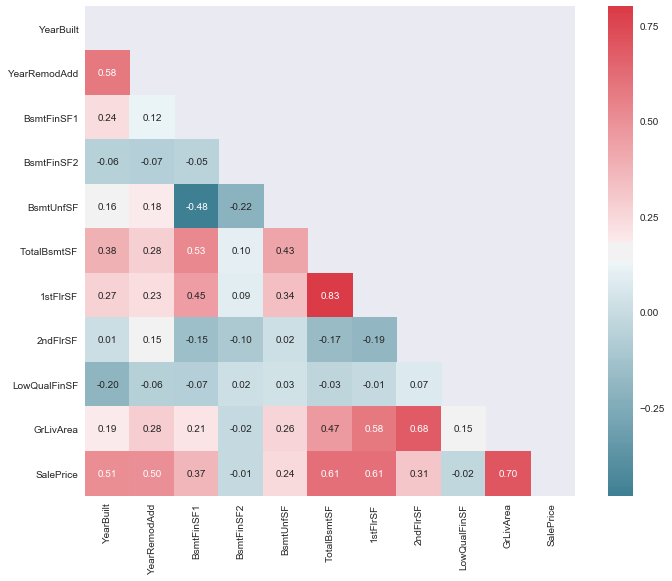

In [16]:
corr_matrix(df_train, H_contin_cols+Price)

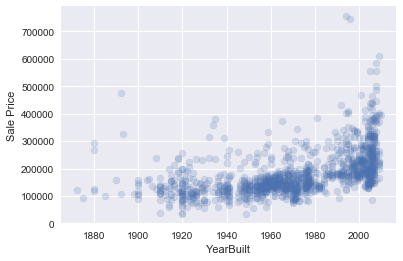

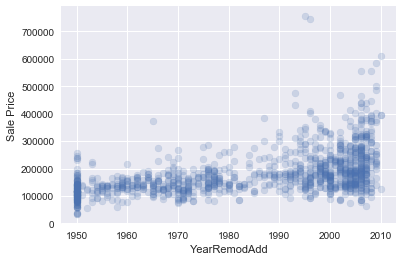

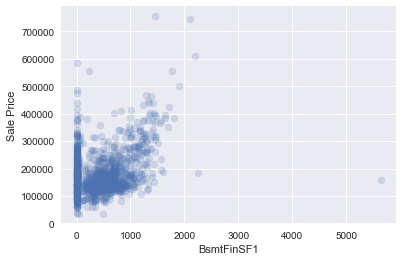

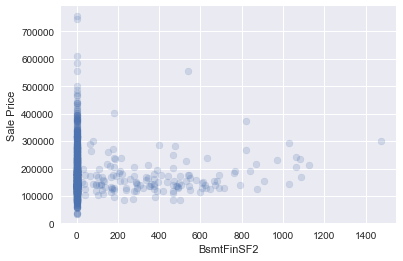

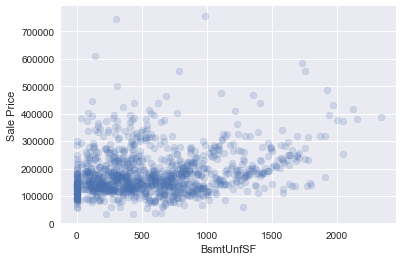

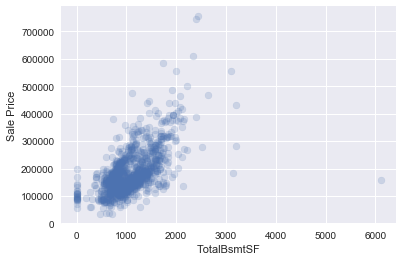

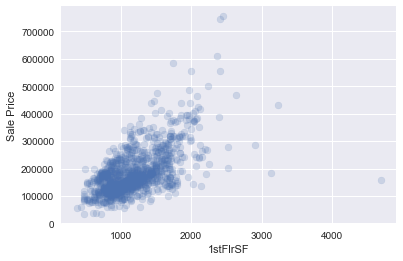

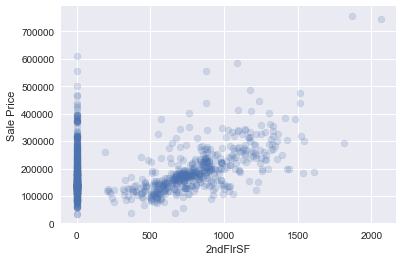

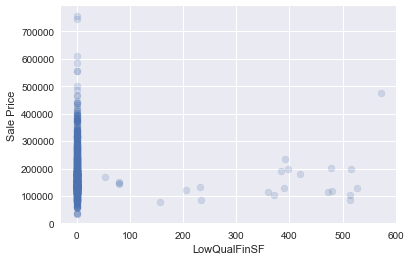

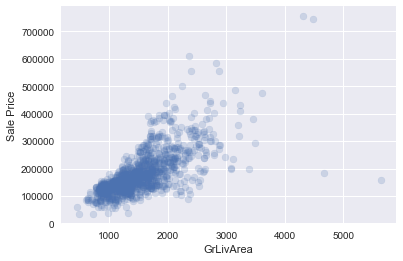

In [17]:
for col in H_contin_cols:
    plt.scatter(df_train[col], df_train[Price], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

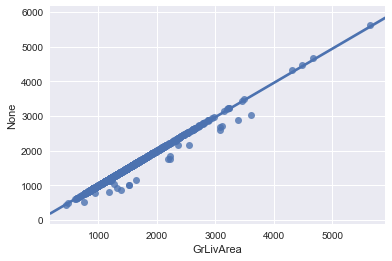

In [18]:
sns.regplot(df_train.GrLivArea, df_train['1stFlrSF']+df_train['2ndFlrSF'])

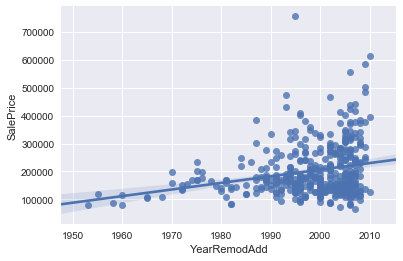

In [22]:
remod = df_train[(df_train['YearRemodAdd']!=df_train['YearBuilt']) & (df_train['YearRemodAdd']>1950)]

sns.regplot(remod['YearRemodAdd'], remod.SalePrice)

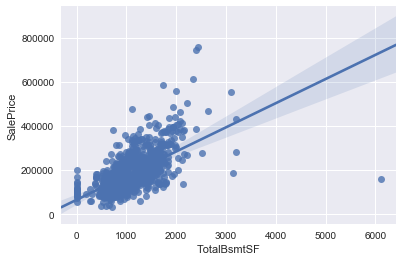

In [251]:
sns.regplot(df_train['TotalBsmtSF'], df_train.SalePrice)

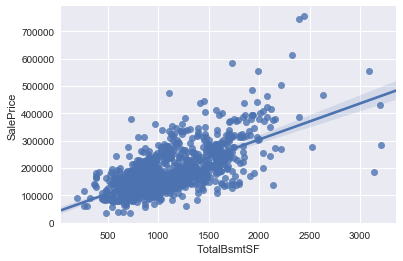

In [256]:
bsmt = df_train[(df_train['TotalBsmtSF']>0)&(df_train['TotalBsmtSF']<6000)]
sns.regplot(bsmt['TotalBsmtSF'], bsmt.SalePrice)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1067199b0>,
      dtype=object)

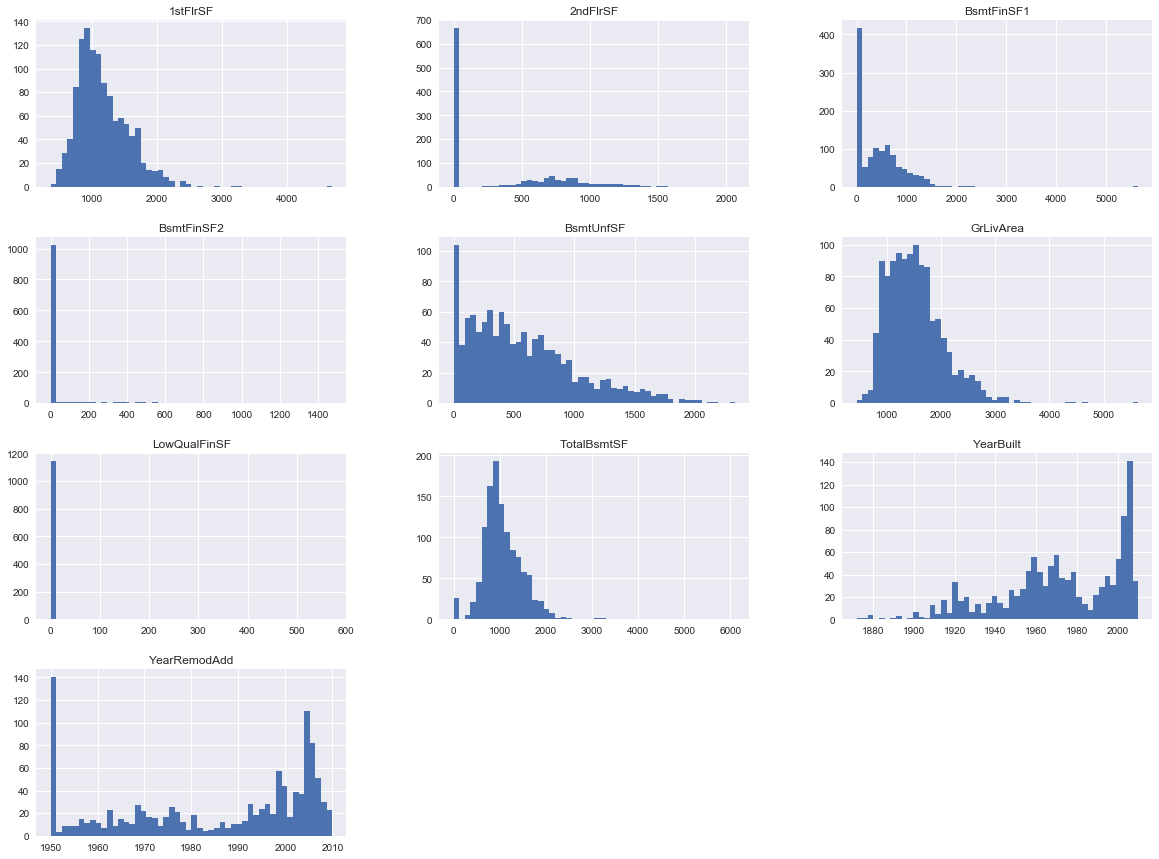

In [119]:
df_train[H_contin_cols].hist(bins=50, figsize=(20,15))

Things to do:

- Use total SF instead of 1st fl and 2fl
- Make Low Qual SF into categorical (1 - has low qual; 0 - no low qual)
- If remodeled and year >1950 - then continuous else 0
- drop 1st fl SF and 2nd fl SF
- drop basement SF other than total
- convert year variables to ordinal
- remove outliers
- Normalize remaining columns

### Lot Continuous

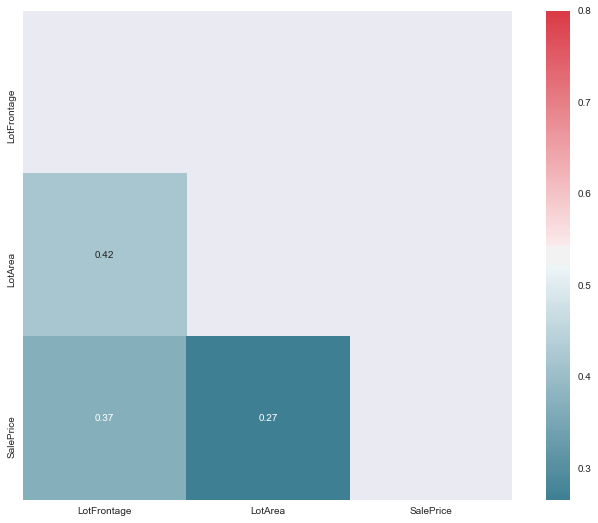

In [182]:
corr_matrix(df_train, L_contin_cols+Price)

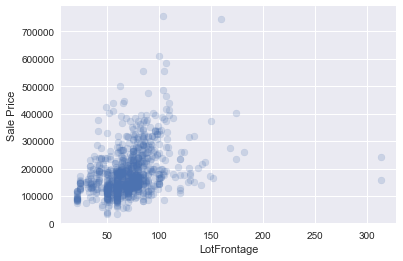

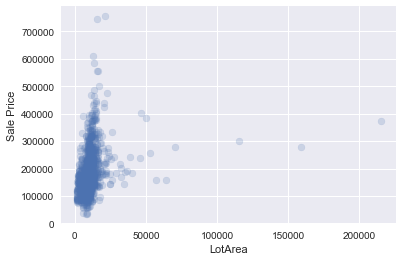

In [144]:
for col in L_contin_cols:
    plt.scatter(df_train[col], df_train[Price], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

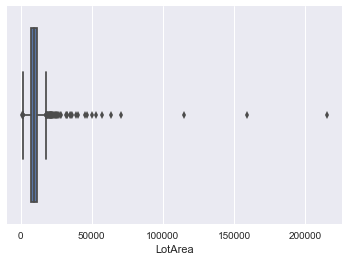

In [165]:
sns.boxplot(df_train['LotArea'])

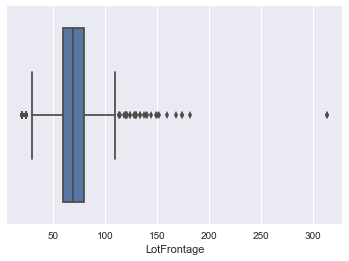

In [172]:
sns.boxplot(df_train['LotFrontage'])

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


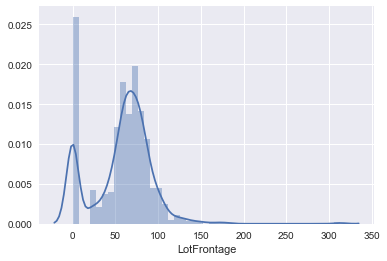

In [176]:
sns.distplot(df_train['LotFrontage'].fillna(0))

In [217]:
lot_cut = df_train[((df_train['LotArea']>30000) & (df_train['SalePrice']<500000)) | 
                   ((df_train['LotFrontage']>300) & (df_train['SalePrice']<500000))]
lot_cut.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,19.000000,19.000000,12.000000,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000,19.000000,...,19.000000,19.000000,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,681.631579,47.368421,127.250000,62471.631579,6.526316,5.421053,1965.421053,1984.263158,223.166667,3.421053,...,223.578947,91.894737,13.157895,0.0,23.052632,25.263158,26.315789,6.052632,2007.578947,242661.789474
std,423.794789,52.793319,93.192982,49153.248763,1.775400,1.261207,22.244390,20.636651,288.406423,0.692483,...,230.109712,117.383935,46.672932,0.0,70.591527,110.119552,114.707867,3.290959,1.261207,78178.056930
min,54.000000,20.000000,50.000000,27650.000000,4.000000,3.000000,1908.000000,1950.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,2006.000000,145000.000000
25%,363.000000,20.000000,66.500000,34891.500000,5.000000,5.000000,1956.000000,1964.500000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.500000,2007.000000,185725.000000
50%,530.000000,20.000000,87.500000,45600.000000,6.000000,5.000000,1961.000000,1987.000000,56.000000,3.000000,...,208.000000,54.000000,0.000000,0.0,0.000000,0.000000,0.000000,6.000000,2007.000000,240000.000000
75%,1060.000000,55.000000,143.250000,60543.500000,7.000000,6.500000,1973.000000,2005.000000,441.750000,4.000000,...,322.000000,117.500000,0.000000,0.0,0.000000,0.000000,0.000000,8.000000,2008.000000,278500.000000
max,1397.000000,190.000000,313.000000,215245.000000,10.000000,8.000000,2008.000000,2008.000000,796.000000,5.000000,...,857.000000,406.000000,200.000000,0.0,263.000000,480.000000,500.000000,12.000000,2010.000000,402000.000000


In [218]:
lot_test = df_train.drop(lot_cut.index)

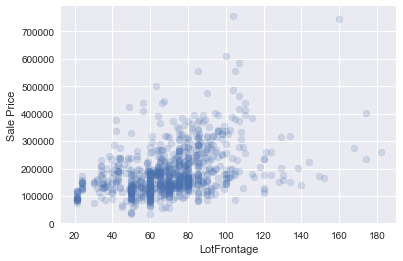

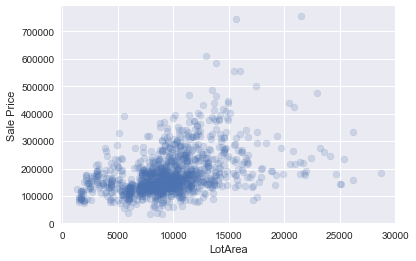

In [219]:
for col in L_contin_cols:
    plt.scatter(lot_test[col], lot_test[Price], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

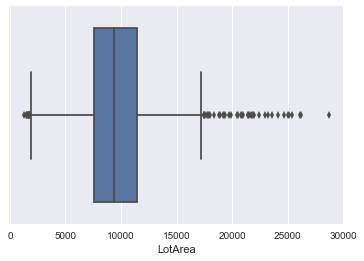

In [220]:
sns.boxplot(lot_test['LotArea'])

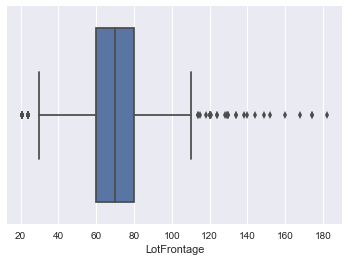

In [221]:
sns.boxplot(lot_test['LotFrontage'])

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


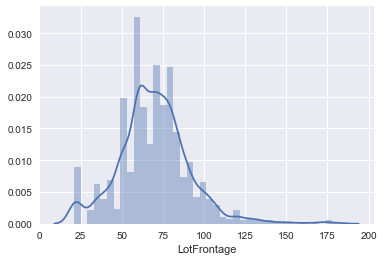

In [225]:
sns.distplot(lot_test['LotFrontage'].dropna())

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


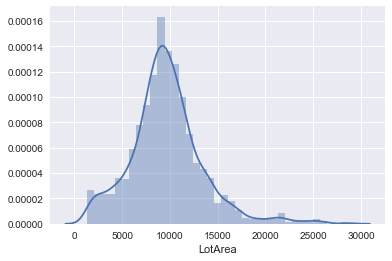

In [226]:
sns.distplot(lot_test['LotArea'])

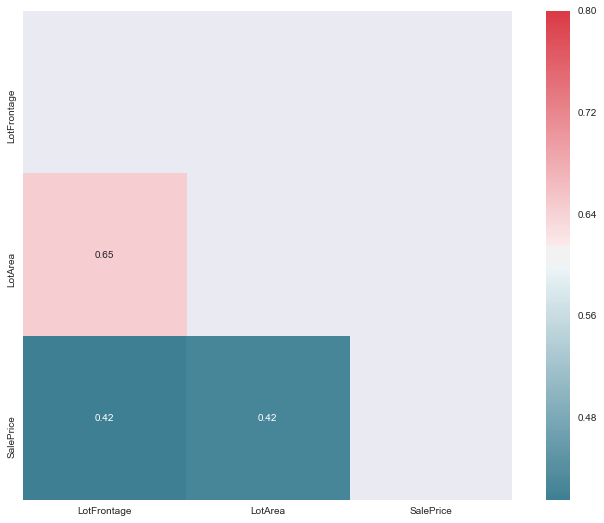

In [227]:
corr_matrix(lot_test, L_contin_cols+Price)

Things to do:

- Option to cut off tails
- Option to log-transform
- Normalize remaining columns

### Garage and Misc Continuous

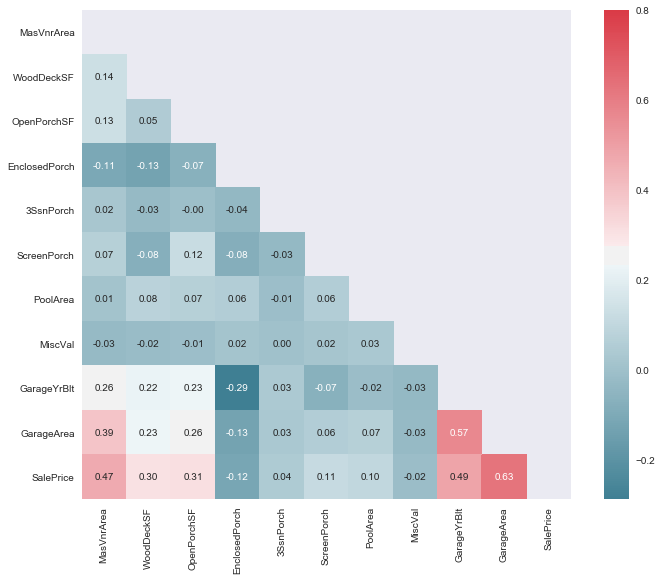

In [228]:
corr_matrix(df_train, M_contin_cols+G_contin_cols+Price)

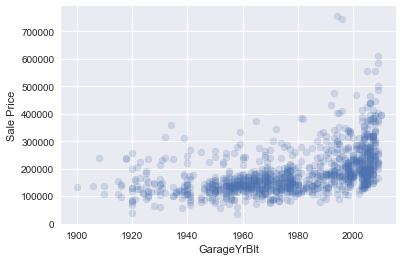

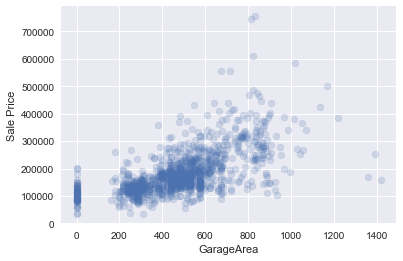

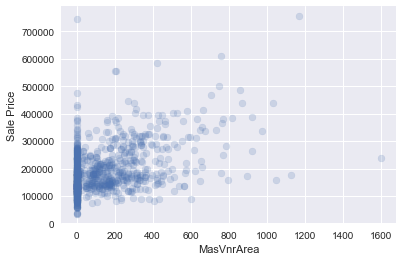

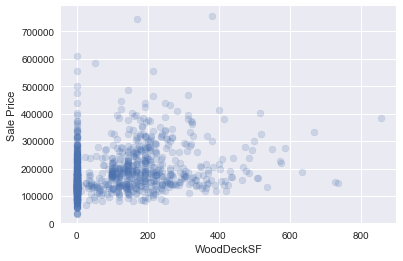

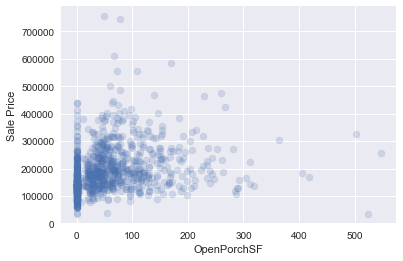

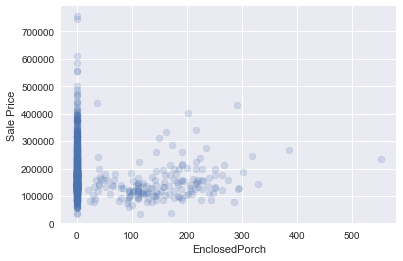

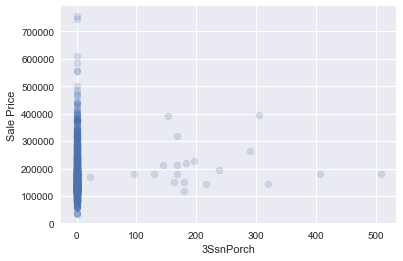

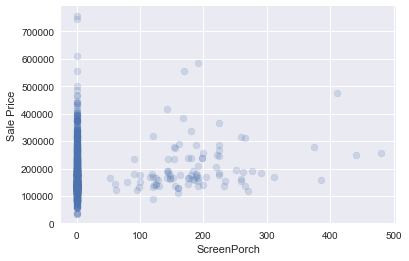

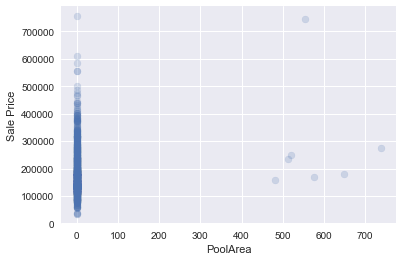

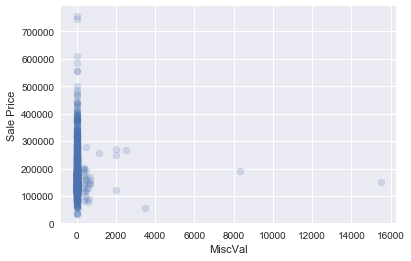

In [229]:
for col in G_contin_cols+M_contin_cols:
    plt.scatter(df_train[col], df_train[Price], alpha=0.2)
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

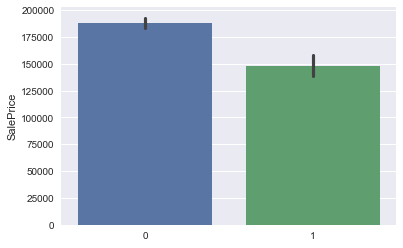

In [244]:
enc_porch = np.where(df_train['EnclosedPorch']>0,1,0)
sns.barplot(enc_porch, df_train.SalePrice)

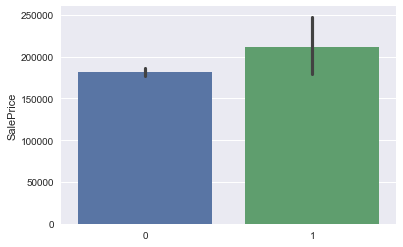

In [246]:
Ssn_porch = np.where(df_train['3SsnPorch']>0,1,0)
sns.barplot(Ssn_porch, df_train.SalePrice)

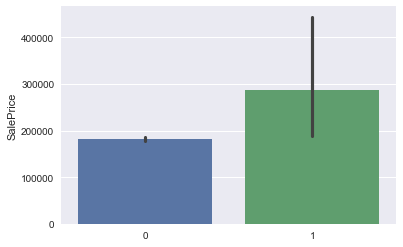

In [248]:
pool = np.where(df_train['PoolArea']>0,1,0)
sns.barplot(pool, df_train.SalePrice)

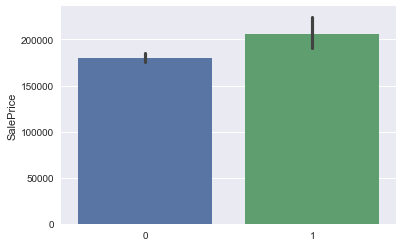

In [24]:
scr_porch = np.where(df_train['ScreenPorch']>0,1,0)
sns.barplot(scr_porch, df_train.SalePrice)

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


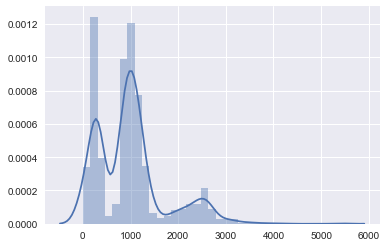

In [234]:
sns.distplot(df_train['GarageArea']*df_train['GarageCars'])

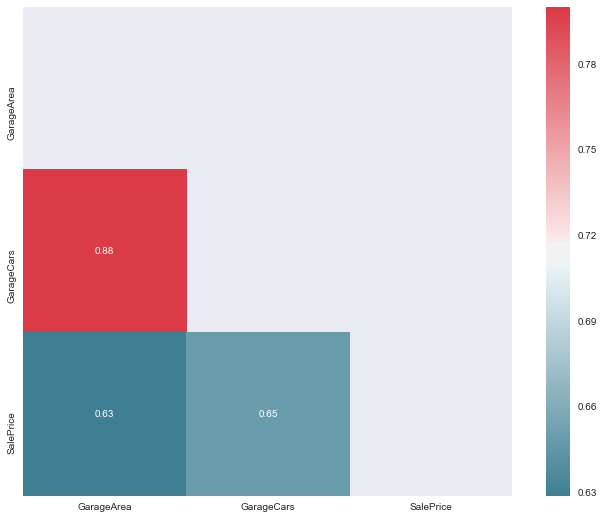

In [235]:
corr_matrix(df_train, ['GarageArea','GarageCars','SalePrice'])

In [250]:
corr_test = df_train[['GarageArea','GarageCars','SalePrice']].copy()
corr_test['GarageComb'] = corr_test['GarageArea']*corr_test['GarageCars']
corr_test['GarageCar2'] = np.where(corr_test['GarageCars']>3,3,corr_test['GarageCars'])

corr = corr_test.corr()
corr['SalePrice'].sort_values(ascending=False)

SalePrice     1.000000
GarageComb    0.689455
GarageCar2    0.656883
GarageCars    0.648987
GarageArea    0.628564
Name: SalePrice, dtype: float64

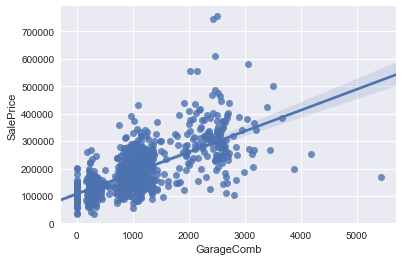

In [238]:
sns.regplot(corr_test['GarageComb'], corr_test.SalePrice)

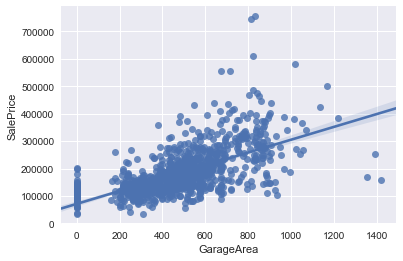

In [241]:
sns.regplot(corr_test['GarageArea'], corr_test.SalePrice)

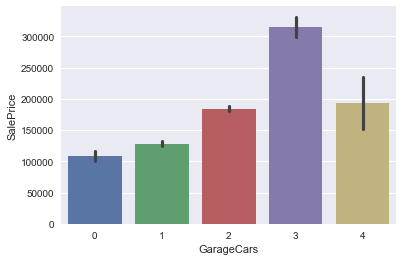

In [249]:
sns.barplot(df_train['GarageCars'], df_train.SalePrice)

Things to do:

- Make PoolArea, ScreenPorch, 3SnPorch, and Enclosed Porch categorical (0,1)
- Drop Garage year built?
- Combine GarageCars and GarageArea into single feature, drop others
- Drop MiscVal
- Normalize remaining columns